In [ ]:
#Importing the necessary libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re #Regular expression (RegEx)
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
plt.style.use("fivethirtyeight")

In [ ]:
consumer_key = 'It6qdrfzzKYBT0F3B1IQYnpEG'
consumer_secret = '2UYJ8ys7zQb6z2251xVpMHeloqK09JnnuXyki7LFZ0bTCnIoiy'
access_token = '1364258204473982978-IrTfDSw2ZvA8IkZqaO30BT0xgBMGv2'
access_token_secret = 'cPSxtNQBI1BetT71fbMP2B3Ok41UXS8QI1bmPeYYKUyqp'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
key_word = 'bitcoin'
limit = 10000 # No. of tweets to be downloaded

In [ ]:
def TextClean(tweet):
  tweet = tweet.lower()
  tweet = re.sub(r'@[a-z0-9_]\S+' , '', tweet)
  tweet = re.sub(r'#[a-z0-9_]\S+', '',tweet)
  tweet = re.sub(r'&[a-z0-9_]\S+','',tweet)
  tweet = re.sub(r'0[?!.+,;$%&"]+','',tweet)
  tweet = re.sub(r'rt[\s]+', '', tweet)
  tweet = re.sub(r'\d+', '', tweet)
  tweet = re.sub(r'\$', '', tweet)
  tweet = re.sub(r'rt+', '', tweet)
  tweet = re.sub(r'https?:?\/\/\S+', '', tweet)
  return tweet

In [ ]:
def tweet_search(key_word):
  i=0
  tweets_df=pd.DataFrame(columns=['Datetime','Tweet','Username','Retweets','Followers'])
  for tweet in tweepy.Cursor(api.search,q=key_word,count=100,lang='en', tweet_mode='extended').items() :
    print("Tweets Downloaded :",i,'/',limit,end = '\r')
    if tweet.user.followers_count > 500 :
      tweets_df = tweets_df.append({'Datetime': tweet.created_at,
                                    'Tweet': tweet.full_text,
                                    'Username': tweet.user.screen_name,
                                    'Retweets': tweet.retweet_count,
                                    'Followers': tweet.user.followers_count},
                                   ignore_index=True)
      i+=1
      if i>= limit:
        break
      else :
        pass
  tweets_df['CleanTweet'] = tweets_df['Tweet'].apply(TextClean)
  #tweets_df.to_csv(key_word + '.csv', encoding = 'utf-8')
  tweets_df.drop_duplicates(subset=['Tweet'], inplace = True)
  tweets_df['CleanTweet'] = tweets_df['Tweet'].apply(TextClean)
  tweet_tokenizer = TweetTokenizer() # Object Construction
  tweets_df['CleanTweet'] = tweets_df['CleanTweet'].apply(tweet_tokenizer.tokenize) 
  tweets_df['CleanTweet'] = [', '.join(map(str, token)) for token in tweets_df['CleanTweet']]
  return tweets_df


In [ ]:
tweets_df =tweet_search(key_word)

In [ ]:
tweets_df

,Datetime,Tweet,Username,Retweets,Followers,CleanTweet
0,2021-03-05 06:58:19,RT @jimmysong: Converting fiat money to #Bitco...,semmoneglynn,67,2233,"conveing, fiat, money, to, is, a, step, out, o..."
1,2021-03-05 06:58:16,RT @ecoinometrics: #Bitcoin after the Halving\...,tomhebron,47,844,"after, the, halving, mar, ., ,, days, after, t..."
2,2021-03-05 06:58:10,RT @PeterSchiff: The Grayscale Bitcoin Trust (...,TrueCrypto27,133,13570,"the, grayscale, bitcoin, trust, (, gbtc, ), cl..."
3,2021-03-05 06:58:08,@Ultra1 @N8twon Financed would be more profita...,JasonEbacher,0,548,"financed, would, be, more, profitable, btc, wi..."
4,2021-03-05 06:58:07,#Bitcoin 📉 \n\n▓▓▓▓▓▓▓▓▓▓▓▓▓▓░ 95%\n\n price: ...,Alert_Shark,0,573,"📉, ▓, ▓, ▓, ░, %, price, :, ."
...,...,...,...,...,...,...
9992,2021-03-04 23:45:11,"Will #bitcoin REACH $55000 to balance price, o...",bitcoinagile,1,55880,"will, reach, to, balance, price, ,, or, am, i,..."
9993,2021-03-04 23:45:08,#crypto #affiliate #affiliatemarketing #affili...,bmurphypointman,0,69749,"free, shipping, on, purchases, over, at"
9994,2021-03-04 23:45:07,#linkedin #twitter #facebook #instagram #gifts...,bmurphypointman,0,69749,"on, purchases, over, at"
9996,2021-03-04 23:45:06,@Eric_BIGfund Genuine question. How much bitco...,DatCryptoBoi,0,2969,"genuine, question, ., how, much, bitcoin, is, ..."


# **Visualisation**

In [ ]:
all_tweets = ' '.join(tweet for tweet in tweets_df['CleanTweet'])
all_tweets

WordCloud = WordCloud(width = 800, height = 400, random_state = 21, max_font_size = 100, collocations = False).generate(all_tweets)


(-0.5, 799.5, 399.5, -0.5)

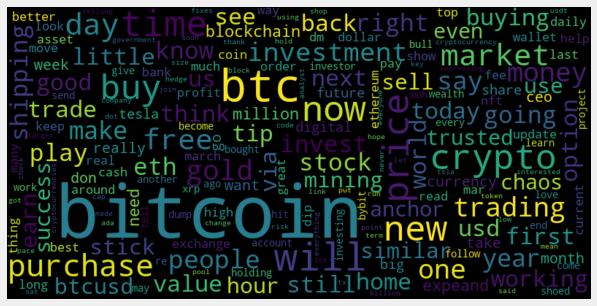

In [ ]:
plt.figure(figsize = (10, 5))
plt.imshow(WordCloud, interpolation = 'bilinear')
plt.axis('off')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

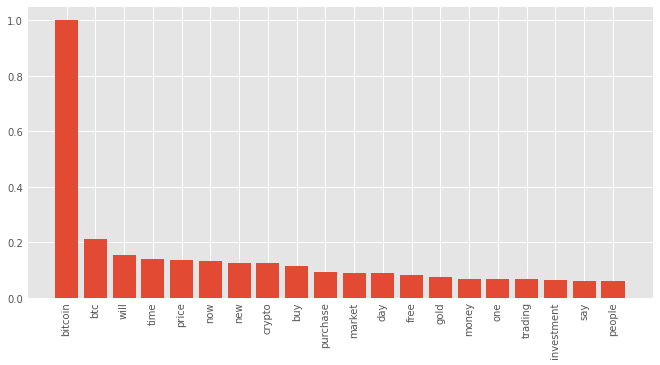

In [ ]:
plt.style.use('ggplot')
word_frequency = pd.DataFrame.from_dict(data = WordCloud.words_, orient = 'index')
word_frequency = word_frequency.head(20)
plt.figure(figsize = (10, 5))
plt.bar(word_frequency.index, word_frequency[0]) # x , y
plt.xticks(rotation = 90)

**Applying NLTK**

In [ ]:
import nltk # Natural language processing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
tokens = word_tokenize(all_tweets)


#Lemmatization
lemmatizer = WordNetLemmatizer()
lemma = [lemmatizer.lemmatize(tweet, pos = 'v') for tweet in tokens]
#print(tokens[:20])
#print(lemma[:20])

#Stemming
porter_stemmer = PorterStemmer()
stemm = [porter_stemmer.stem(tweet) for tweet in tokens]
#print(tokens[:20])
#print(stemm[:20])

#Print lenghts of lists to check if we didn't lose any tokens in the process
print('Number of word in tweets:', len(all_tweets))
print('Number of tokens:', len(tokens))
print('Number of lemmas:', len(lemma))
print('Number of stemms:', len(stemm))

Number of word in tweets: 849544
Number of tokens: 286210
Number of lemmas: 286210
Number of stemms: 286210


In [ ]:
df = pd.DataFrame(columns = ['Tokens', 'Stemm', 'Lemma'])
df['Tokens'] = tokens[:50]
df['Stemm'] = stemm[:50]
df['Lemma'] = lemma[:50]


In [ ]:
df

,Tokens,Stemm,Lemma
0,conveing,conv,conveing
1,",",",",","
2,fiat,fiat,fiat
3,",",",",","
4,money,money,money
5,",",",",","
6,to,to,to
7,",",",",","
8,is,is,be
9,",",",",","


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 4.3MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def vader_compound_score(tweet):
    vader = SentimentIntensityAnalyzer()
    if vader.polarity_scores(tweet)['compound'] >= 0.05:
        return 'Positive'
    elif vader.polarity_scores(tweet)['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
!pip install TextBlob

In [ ]:
def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
tweets_df['Vader_sent'] = tweets_df['CleanTweet'].apply(vader_compound_score)
tweets_df['TextBlob_sent'] = tweets_df['CleanTweet'].apply(textblob_sentiment)
tweets_df['Different_sent'] = np.where(tweets_df['Vader_sent'] != tweets_df['TextBlob_sent'], 1, 0)

In [ ]:
vader_pie = [len(tweets_df[tweets_df['Vader_sent'] == 'Positive']),
             len(tweets_df[tweets_df['Vader_sent'] == 'Negative']),
             len(tweets_df[tweets_df['Vader_sent'] == 'Neutral'])]
blob_pie = [len(tweets_df[tweets_df['TextBlob_sent'] == 'Positive']),
            len(tweets_df[tweets_df['TextBlob_sent'] == 'Negative']),
            len(tweets_df[tweets_df['TextBlob_sent'] == 'Neutral'])]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['aquamarine', 'tomato', 'skyblue']

print(len(tweets_df[tweets_df['Different_sent'] == 1]), 'times two approaches show different results')

2716 times two approaches show different results


In [ ]:
tweets_df

,Datetime,Tweet,Username,Retweets,Followers,CleanTweet,Vader_sent,TextBlob_sent,Different_sent
0,2021-03-05 06:58:19,RT @jimmysong: Converting fiat money to #Bitco...,semmoneglynn,67,2233,"conveing, fiat, money, to, is, a, step, out, o...",Negative,Neutral,1
1,2021-03-05 06:58:16,RT @ecoinometrics: #Bitcoin after the Halving\...,tomhebron,47,844,"after, the, halving, mar, ., ,, days, after, t...",Neutral,Negative,1
2,2021-03-05 06:58:10,RT @PeterSchiff: The Grayscale Bitcoin Trust (...,TrueCrypto27,133,13570,"the, grayscale, bitcoin, trust, (, gbtc, ), cl...",Positive,Negative,1
3,2021-03-05 06:58:08,@Ultra1 @N8twon Financed would be more profita...,JasonEbacher,0,548,"financed, would, be, more, profitable, btc, wi...",Positive,Positive,0
4,2021-03-05 06:58:07,#Bitcoin 📉 \n\n▓▓▓▓▓▓▓▓▓▓▓▓▓▓░ 95%\n\n price: ...,Alert_Shark,0,573,"📉, ▓, ▓, ▓, ░, %, price, :, .",Neutral,Neutral,0
...,...,...,...,...,...,...,...,...,...
9992,2021-03-04 23:45:11,"Will #bitcoin REACH $55000 to balance price, o...",bitcoinagile,1,55880,"will, reach, to, balance, price, ,, or, am, i,...",Neutral,Positive,1
9993,2021-03-04 23:45:08,#crypto #affiliate #affiliatemarketing #affili...,bmurphypointman,0,69749,"free, shipping, on, purchases, over, at",Positive,Positive,0
9994,2021-03-04 23:45:07,#linkedin #twitter #facebook #instagram #gifts...,bmurphypointman,0,69749,"on, purchases, over, at",Neutral,Neutral,0
9996,2021-03-04 23:45:06,@Eric_BIGfund Genuine question. How much bitco...,DatCryptoBoi,0,2969,"genuine, question, ., how, much, bitcoin, is, ...",Positive,Positive,0


Text(0.5, 1.0, 'Vader')

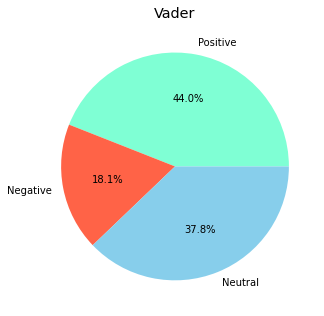

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.pie(vader_pie, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Vader')

Text(0.5, 1.0, 'TextBlob')

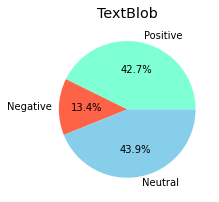

In [ ]:
plt.subplot(1, 2, 2)

plt.pie(blob_pie, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('TextBlob')

In [ ]:
# Future Works (for end sem)
# Machine learning appraoch ( Classification : logisticregression,bag of words NLP , naive bias )
# end - to end model

In [ ]:

import nltk
import re
import pandas as pd

nltk.download('twitter_samples')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

from nltk.corpus import twitter_samples
positive_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tokens = twitter_samples.tokenized('negative_tweets.json')

from nltk.tag import pos_tag
position_tag = pos_tag(positive_tokens[2])
position_tag


[('@DespiteOfficial', 'JJ'),
 ('we', 'PRP'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('listen', 'VBN'),
 ('last', 'JJ'),
 ('night', 'NN'),
 (':)', 'NN'),
 ('As', 'IN'),
 ('You', 'PRP'),
 ('Bleed', 'VBP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('amazing', 'JJ'),
 ('track', 'NN'),
 ('.', '.'),
 ('When', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('in', 'IN'),
 ('Scotland', 'NNP'),
 ('?', '.'),
 ('!', '.')]

In [ ]:

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemma = []
for word, tag in position_tag:
    lemma.append(lemmatizer.lemmatize(word, pos = 'v'))
lemma


['@DespiteOfficial',
 'we',
 'have',
 'a',
 'listen',
 'last',
 'night',
 ':)',
 'As',
 'You',
 'Bleed',
 'be',
 'an',
 'amaze',
 'track',
 '.',
 'When',
 'be',
 'you',
 'in',
 'Scotland',
 '?',
 '!']

In [ ]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

without_stop = [i for i in lemma if i not in stop_words]
without_stop


['@DespiteOfficial',
 'listen',
 'last',
 'night',
 ':)',
 'As',
 'You',
 'Bleed',
 'amaze',
 'track',
 '.',
 'When',
 'Scotland',
 '?',
 '!']

In [ ]:

def clean_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    clean_list = []
    for token, tag in pos_tag(tokens):
        token = token.lower()
        token = re.sub(r'@[a-z0-9_]\S+', '', token)
        token = re.sub(r'#[a-z0-9_]\S+', '', token)
        token = re.sub(r'&[a-z0-9_]\S+', '', token)
        token = re.sub(r'[?!.+,;$£%&"]+', '', token)
        token = re.sub(r'rt[\s]+', '', token)
        token = re.sub(r'\d+', '', token)
        token = re.sub(r'\$', '', token)
        token = re.sub(r'rt+', '', token)
        token = re.sub(r'https?:?\/\/\S+', '', token)
        if tag.startswith('NN'):
            position = 'n'
        elif tag.startswith('VB'):
            position = 'v'
        elif tag.startswith('RB'):
            position = 'r'
        elif tag.startswith('JJ'):
            position = 'a'
        else:
            position = 'n'

        clean_list.append(lemmatizer.lemmatize(token, pos = position))
        clean_list = [i for i in clean_list if i not in stop_words and len(i) > 0 and i != ':']

    return clean_list


In [ ]:

clean_positive = list(map(clean_tokens, positive_tokens))
clean_negative = list(map(clean_tokens, negative_tokens))
print(positive_tokens[0])
print(clean_positive[0])


['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['top', 'engage', 'member', 'community', 'week', ':)']


In [ ]:

def data_prepare(tokens, status):
    featureset = [(tweet, status) for tweet in tokens]
    return featureset

positive_featureset = data_prepare(clean_positive, 'Positive')
negative_featureset = data_prepare(clean_negative, 'Negative')


In [ ]:

featureset = positive_featureset + negative_featureset
featureset[-5:]

features = []
labels = []

for x in featureset:
    features.append(x[0])
    labels.append(x[1])

print(features[0])
print(labels[0])

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 2), sublinear_tf = True, max_features = 3000, preprocessor = ' '.join)
vectorized_features = vectorizer.fit_transform(features)


['top', 'engage', 'member', 'community', 'week', ':)']
Positive


In [ ]:

vocabulary = vectorizer.get_feature_names()
print(vocabulary[:15])
print(len(vocabulary))


['ab', 'able', 'able see', 'abroad', 'absolute', 'absolutely', 'abt', 'acc', 'access', 'account', 'across', 'act', 'act like', 'active', 'actually']
3000


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorized_features, labels, test_size = 0.15, shuffle = True)


In [ ]:

from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators = 200)
classifier = text_classifier.fit(X_train, y_train)


In [ ]:

predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.73      0.77      0.75       782
    Positive       0.74      0.69      0.71       718

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500

0.734


In [ ]:

test_tweets = twitter_samples.tokenized('tweets.20150430-223406.json')
clean_test_tweets = list(map(clean_tokens, test_tweets))

print(test_tweets[0])
print(clean_test_tweets[0])

pd.set_option('max_colwidth', 1000)

df = pd.DataFrame()
df['Tweets'] = clean_test_tweets
df['Sentiment'] = classifier.predict(vectorizer.transform(list(clean_test_tweets)))
df.head(10)


['RT', '@KirkKus', ':', 'Indirect', 'cost', 'of', 'the', 'UK', 'being', 'in', 'the', 'EU', 'is', 'estimated', 'to', 'be', 'costing', 'Britain', '£', '170', 'billion', 'per', 'year', '!', '#BetterOffOut', '#UKIP']
['indirect', 'cost', 'uk', 'eu', 'estimate', 'cost', 'britain', 'billion', 'per', 'year']


,Tweets,Sentiment
0,"[indirect, cost, uk, eu, estimate, cost, britain, billion, per, year]",Positive
1,"[video, sturgeon, post-election, deal]",Negative
2,"[economy, grow, time, faster, day, david, cameron, become, prime, minister, today]",Negative
3,"[ukip, east, lothian, candidate, look, still, msn, addy]",Negative
4,"[ukip's, housing, spokesman, rake, k, housing, benefit, migrant]",Negative
5,"[make, sure, tune, tonight, bbc]",Positive
6,"[ed, milliband, embarrassment, would, want, represent, uk, vote]",Negative
7,"[ft, back, tory, unrelated, note, here's, photo, ft, leader, writer, jonathan, ford, (, next, boris, )]",Positive
8,"[“, ed, miliband, prove, tonight, he's, job, ”, tbf, spend, year, salivate, …]",Positive
9,"[lolz, trickle, wealth, never, trickle, past, wallet, greed, always, win, greedy]",Negative


**Bag of words model**